In [1]:
"""1) alpha — Regularization gücü (en önemli parametre!)

Ceza katsayısıdır (L2 penalty).

Alpha ↑ → Daha güçlü regularizasyon → Katsayılar küçülür → Overfitting azalır.

Alpha ↓ → Regularizasyon azalır → Model daha esnek → Overfitting riski artar.

➡ En kritik hiperparametre.
🟩 2) solver — Çözüm algoritması

Modeli hangi optimizasyon yöntemiyle çözeceğini belirler.

Kısaca:

‘auto’ → sklearn kendisi karar verir

‘sag’ / ‘saga’ → büyük ve yüksek boyutlu veri için hızlı

‘lbfgs’ → küçük–orta veri için çok stabil

‘lsqr’ / ‘sparse_cg’ → sparse matrisler için iyi

‘svd’ / ‘cholesky’ → kapalı form çözümler (küçük veri için)

➡ Verinin boyutuna göre hız/stabilite fark eder.
🟨 3) max_iter — Maksimum iterasyon sayısı

Solver iteratif çalışıyorsa:

max_iter çözüme ulaşmak için izin verilen en fazla adım.

Yetmezse ConvergenceWarning verir.

➡ Genelde 1000–5000 yeterli.

🟧 4) tol — Durdurma eşiği (convergence toleransı)

Model optimizasyonu ne zaman durduracak?

Küçük tol → daha hassas çözüm → daha uzun süre

Büyük tol → daha hızlı ama daha kaba çözüm

➡ Varsayılan (1e-4) çoğu zaman yeterli."""

'1) alpha — Regularization gücü (en önemli parametre!)\n\nCeza katsayısıdır (L2 penalty).\n\nAlpha ↑ → Daha güçlü regularizasyon → Katsayılar küçülür → Overfitting azalır.\n\nAlpha ↓ → Regularizasyon azalır → Model daha esnek → Overfitting riski artar.\n\n➡ En kritik hiperparametre.\n🟩 2) solver — Çözüm algoritması\n\nModeli hangi optimizasyon yöntemiyle çözeceğini belirler.\n\nKısaca:\n\n‘auto’ → sklearn kendisi karar verir\n\n‘sag’ / ‘saga’ → büyük ve yüksek boyutlu veri için hızlı\n\n‘lbfgs’ → küçük–orta veri için çok stabil\n\n‘lsqr’ / ‘sparse_cg’ → sparse matrisler için iyi\n\n‘svd’ / ‘cholesky’ → kapalı form çözümler (küçük veri için)\n\n➡ Verinin boyutuna göre hız/stabilite fark eder.\n🟨 3) max_iter — Maksimum iterasyon sayısı\n\nSolver iteratif çalışıyorsa:\n\nmax_iter çözüme ulaşmak için izin verilen en fazla adım.\n\nYetmezse ConvergenceWarning verir.\n\n➡ Genelde 1000–5000 yeterli.\n\n🟧 4) tol — Durdurma eşiği (convergence toleransı)\n\nModel optimizasyonu ne zaman durduraca

In [15]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import Ridge
from sklearn.metrics import r2_score
import pandas as pd
import numpy as np
import itertools
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import matplotlib.pyplot as plt


In [2]:
data = pd.read_csv('final_data.csv')
#data = data[:1000]
X = data.drop('popularity', axis=1)
y = data['popularity']

In [3]:
grid = {
    'alpha': [0.1, 1.0, 10.0, 100.0, 200.0, 500.0],
    'solver': ['sag', 'auto', 'lsqr', 'sparse_cg'],
    'tol': [1e-3, 1e-2, 1e-1],
    'max_iter': [1000, 2000, 5000, 7500, 10000]
}

In [4]:
def grid_search_ridge(X, y, grid):
    X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train)
    X_val_scaled = scaler.transform(X_val)
    keys = grid.keys()
    values = grid.values()

    best_r2 = -float('inf')
    for combo in itertools.product(*values):
        params = dict(zip(keys, combo))

        model = Ridge(**params)
        model.fit(X_train_scaled, y_train)

        y_pred = model.predict(X_val_scaled)

        r2 = r2_score(y_val, y_pred)
        #print(f"Params: {params}, R2: {r2}")
        if r2 > best_r2:
            best_r2 = r2
            best_params = params

    return best_params, best_r2

In [5]:
X_train1, X_test1, y_train1, y_test1 = train_test_split(X, y, test_size=0.2, random_state=42)
best_params, best_r2 = grid_search_ridge(X_train1, y_train1, grid)
print("\n\nThe best parameters are: ", best_params)
print("Best R2 score: ", best_r2)



The best parameters are:  {'alpha': 10.0, 'solver': 'sag', 'tol': 0.01, 'max_iter': 10000}
Best R2 score:  0.5863360019411612


In [6]:
model = Ridge(**best_params)
scaler = StandardScaler()
X_train1_scaled = scaler.fit_transform(X_train1)
X_test1_scaled = scaler.transform(X_test1)
model.fit(X_train1_scaled, y_train1)
y_pred = model.predict(X_test1_scaled)
r2 = r2_score(y_test1, y_pred)
print("R2 score with best parameters on test set: ", r2)


R2 score with best parameters on test set:  0.5965192005000235


In [12]:
test_mae = mean_absolute_error(y_test1, y_pred)
test_rmse = np.sqrt(mean_squared_error(y_test1, y_pred))
test_r2 = r2_score(y_test1, y_pred)

print("\n=== RIDGE – TEST PERFORMANCE ===")
print("MAE :", test_mae)
print("RMSE:", test_rmse)
print("R²  :", test_r2)


=== RIDGE – TEST PERFORMANCE ===
MAE : 10.389489750179749
RMSE: 15.084437284968391
R²  : 0.5965192005000235


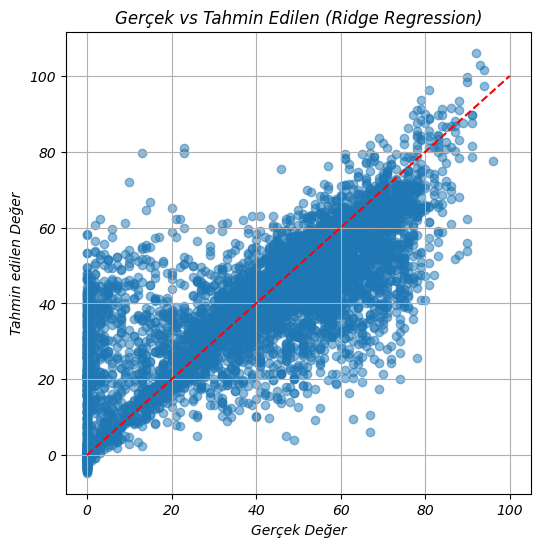

In [17]:
plt.figure(figsize=(6,6))
plt.scatter(y_test1, y_pred, alpha=0.5)
plt.xlabel("Gerçek Değer")
plt.ylabel("Tahmin edilen Değer")
plt.title("Gerçek vs Tahmin Edilen (Ridge Regression)")
plt.plot([y.min(), y.max()], [y.min(), y.max()], 'r--')
plt.grid(True)
plt.show()